In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import timeit

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.impute import KNNImputer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from mlxtend.classifier import StackingCVClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn import metrics
from scipy import stats

Using TensorFlow backend.


In [106]:
bond_ratings=pd.read_csv('/Users/debajyotidas/Google Drive/PGP-AIML/External Hackathon/bond_ratings.csv')
fund_allocations=pd.read_csv('/Users/debajyotidas/Google Drive/PGP-AIML/External Hackathon/fund_allocations.csv')
fund_config=pd.read_csv('/Users/debajyotidas/Google Drive/PGP-AIML/External Hackathon/fund_config.csv')
fund_ratios=pd.read_csv('/Users/debajyotidas/Google Drive/PGP-AIML/External Hackathon/fund_ratios.csv')
fund_specs=pd.read_csv('/Users/debajyotidas/Google Drive/PGP-AIML/External Hackathon/fund_specs.csv')
other_specs=pd.read_csv('/Users/debajyotidas/Google Drive/PGP-AIML/External Hackathon/other_specs.csv')
return_3year=pd.read_csv('/Users/debajyotidas/Google Drive/PGP-AIML/External Hackathon/return_3year.csv')
return_5year=pd.read_csv('/Users/debajyotidas/Google Drive/PGP-AIML/External Hackathon/return_5year.csv')
return_10year=pd.read_csv('/Users/debajyotidas/Google Drive/PGP-AIML/External Hackathon/return_10year.csv')

In [25]:
print ("The shape of bond_ratings is: ",bond_ratings.shape)
print ("The shape of fund_allocations is: ",fund_allocations.shape)
print ("The shape of fund_config is: ",fund_config.shape)
print ("The shape of fund_ratios is: ",fund_ratios.shape)
print ("The shape of fund_specs is: ",fund_specs.shape)
print ("The shape of other_specs is: ",other_specs.shape)
print ("The shape of return_3year is: ",return_3year.shape)
print ("The shape of return_5year is: ",return_5year.shape)
print ("The shape of return_10year is: ",return_10year.shape)

The shape of bond_ratings is:  (25000, 12)
The shape of fund_allocations is:  (25000, 12)
The shape of fund_config is:  (25000, 4)
The shape of fund_ratios is:  (25000, 8)
The shape of fund_specs is:  (25000, 9)
The shape of other_specs is:  (25000, 43)
The shape of return_3year is:  (25000, 17)
The shape of return_5year is:  (25000, 17)
The shape of return_10year is:  (25000, 17)


#### *All files have 25000 datapoints. However, at this point we don't know how many of these have missing/incorrect values. We will need to investigate that & device suitable handling for that down the line*

In [775]:
print(bond_ratings.shape)
bond_ratings.info()

(25000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bb_rating            24886 non-null  float64
 1   us_govt_bond_rating  24886 non-null  float64
 2   below_b_rating       24886 non-null  float64
 3   others_rating        24886 non-null  float64
 4   maturity_bond        8093 non-null   float64
 5   b_rating             24886 non-null  float64
 6   tag                  25000 non-null  int64  
 7   a_rating             24886 non-null  float64
 8   aaa_rating           24886 non-null  float64
 9   aa_rating            24886 non-null  float64
 10  bbb_rating           24886 non-null  float64
 11  duration_bond        9874 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 2.3 MB


In [776]:
print(bond_ratings.isna().sum())
bond_ratings.describe().T

bb_rating                114
us_govt_bond_rating      114
below_b_rating           114
others_rating            114
maturity_bond          16907
b_rating                 114
tag                        0
a_rating                 114
aaa_rating               114
aa_rating                114
bbb_rating               114
duration_bond          15126
dtype: int64


,count,mean,std,min,25%,50%,75%,max
bb_rating,24886.0,3.473804,8.299747,0.00,0.00,0.00,2.450,80.47
us_govt_bond_rating,24886.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00
below_b_rating,24886.0,0.827525,2.700019,-0.02,0.00,0.00,0.100,42.30
others_rating,24886.0,1.666769,6.885158,-68.21,0.00,0.00,0.330,100.00
maturity_bond,8093.0,7.765444,4.148558,0.00,5.46,7.29,8.920,29.30
b_rating,24886.0,3.234399,9.197164,-0.12,0.00,0.00,0.710,80.68
tag,25000.0,139878.934640,65731.287074,26000.00,83021.75,139881.50,196759.250,253763.00
a_rating,24886.0,5.054436,9.261811,0.00,0.00,0.00,8.340,72.87
aaa_rating,24886.0,14.558310,25.636838,-3.15,0.00,0.00,18.955,118.65
aa_rating,24886.0,4.209073,11.164511,-0.19,0.00,0.00,3.010,90.22


In [777]:
print(fund_allocations.shape)
fund_allocations.info()

(25000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   portfolio_communication_allocation      24886 non-null  float64
 1   portfolio_financial_services            24886 non-null  float64
 2   portfolio_industrials_allocation        24886 non-null  float64
 3   portfolio_tech_allocation               24886 non-null  float64
 4   portfolio_materials_basic_allocation    24886 non-null  float64
 5   portfolio_energy_allocation             24886 non-null  float64
 6   portfolio_consumer_defence_allocation   24886 non-null  float64
 7   portfolio_healthcare_allocation         24886 non-null  float64
 8   portfolio_property_allocation           24886 non-null  float64
 9   id                                      25000 non-null  int64  
 10  portfolio_utils_allocation              24886 

In [778]:
print(fund_allocations.isna().sum())
fund_allocations.describe().T

portfolio_communication_allocation        114
portfolio_financial_services              114
portfolio_industrials_allocation          114
portfolio_tech_allocation                 114
portfolio_materials_basic_allocation      114
portfolio_energy_allocation               114
portfolio_consumer_defence_allocation     114
portfolio_healthcare_allocation           114
portfolio_property_allocation             114
id                                          0
portfolio_utils_allocation                114
portfolio_cyclical_consumer_allocation    114
dtype: int64


,count,mean,std,min,25%,50%,75%,max
portfolio_communication_allocation,24886.0,2.272270,4.404629,0.0,0.00,1.180,3.41,100.0
portfolio_financial_services,24886.0,11.838126,12.286453,0.0,0.00,13.120,17.91,100.0
portfolio_industrials_allocation,24886.0,9.055996,10.170428,0.0,0.00,9.570,12.75,100.0
portfolio_tech_allocation,24886.0,12.780061,12.558221,0.0,0.00,12.885,19.65,100.0
portfolio_materials_basic_allocation,24886.0,3.898250,8.136322,0.0,0.00,2.790,5.06,100.0
portfolio_energy_allocation,24886.0,5.826646,13.687201,0.0,0.00,3.380,6.25,100.0
portfolio_consumer_defence_allocation,24886.0,5.111333,6.078521,0.0,0.00,4.840,7.88,100.0
portfolio_healthcare_allocation,24886.0,8.536916,9.618490,0.0,0.00,9.370,13.56,100.0
portfolio_property_allocation,24886.0,4.926447,13.855415,0.0,0.00,1.550,4.44,100.0
id,25000.0,139878.934640,65731.287074,26000.0,83021.75,139881.500,196759.25,253763.0


In [779]:
print(fund_config.shape)
fund_config.info()

(25000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        25000 non-null  object
 1   parent_company  25000 non-null  object
 2   fund_id         25000 non-null  object
 3   fund_name       25000 non-null  object
dtypes: object(4)
memory usage: 781.4+ KB


In [780]:
print(fund_config.isna().sum())
fund_config.describe().T

category          0
parent_company    0
fund_id           0
fund_name         0
dtype: int64


,count,unique,top,freq
category,25000,111,Large Growth,1335
parent_company,25000,761,Fidelity Investments,966
fund_id,25000,25000,0211a7c9-0e99-4c9e-bf09-0cfb2be26360,1
fund_name,25000,24958,Hatteras Alternative Mutual Funds Trust - Hatt...,4


In [107]:
#Converting the different mutual fund categories (111 of them to be precise, as shown above) into an one-hot encoded
#form using LabelBinarizer
lb = LabelBinarizer()
fund_config['category'] = lb.fit_transform(fund_config['category'])

In [782]:
print(fund_ratios.shape)
fund_ratios.info()

(25000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fund_id                        25000 non-null  object 
 1   tag                            25000 non-null  int64  
 2   fund_ratio_net_annual_expense  25000 non-null  float64
 3   pb_ratio                       24886 non-null  float64
 4   ps_ratio                       24886 non-null  object 
 5   mmc                            24886 non-null  object 
 6   pc_ratio                       24886 non-null  object 
 7   pe_ratio                       24886 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.5+ MB


In [783]:
print(fund_ratios.isna().sum())
fund_ratios.describe().T

fund_id                            0
tag                                0
fund_ratio_net_annual_expense      0
pb_ratio                         114
ps_ratio                         114
mmc                              114
pc_ratio                         114
pe_ratio                         114
dtype: int64


,count,mean,std,min,25%,50%,75%,max
tag,25000.0,139878.934640,65731.287074,26000.0,83021.75,139881.50,196759.25,253763.00
fund_ratio_net_annual_expense,25000.0,1.121677,0.609215,0.0,0.72,1.01,1.44,15.17
pb_ratio,24886.0,1.854262,2.984248,0.0,0.56,1.85,2.38,123.30


In [784]:
print(fund_specs.shape)
fund_specs.info()

(25000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   investment_class   23520 non-null  object 
 1   currency           25000 non-null  object 
 2   total_assets       24881 non-null  float64
 3   yield              24873 non-null  float64
 4   greatstone_rating  20000 non-null  float64
 5   inception_date     25000 non-null  object 
 6   tag                25000 non-null  int64  
 7   fund_size          23520 non-null  object 
 8   return_ytd         24892 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


In [785]:
print(fund_specs.isna().sum())
fund_specs.describe().T

investment_class     1480
currency                0
total_assets          119
yield                 127
greatstone_rating    5000
inception_date          0
tag                     0
fund_size            1480
return_ytd            108
dtype: int64


,count,mean,std,min,25%,50%,75%,max
total_assets,24881.0,3.476451e+09,1.827507e+10,19160.0,93030000.00,4.417900e+08,1.620000e+09,7.727200e+11
yield,24873.0,1.850446e+00,1.804311e+00,0.0,0.48,1.650000e+00,2.640000e+00,4.536000e+01
greatstone_rating,20000.0,2.839750e+00,1.277439e+00,0.0,2.00,3.000000e+00,4.000000e+00,5.000000e+00
tag,25000.0,1.398789e+05,6.573129e+04,26000.0,83021.75,1.398815e+05,1.967592e+05,2.537630e+05
return_ytd,24892.0,9.288884e+00,5.801027e+00,-36.3,4.43,9.820000e+00,1.308000e+01,4.629000e+01


In [27]:
fund_specs['investment_class'].value_counts()

Blend     10298
Growth     6671
Value      6551
Name: investment_class, dtype: int64

In [108]:
#One-Hot encoding the 3 different Investment Class
dummy=pd.get_dummies(fund_specs['investment_class'])
fund_specs=pd.concat([fund_specs,dummy],axis=1)
fund_specs.drop('investment_class',axis=1,inplace=True)

In [29]:
fund_specs['fund_size'].value_counts()

Large     14173
Medium     6009
Small      3338
Name: fund_size, dtype: int64

In [109]:
#One-Hot encoding the 3 different Fund Size
dummy=pd.get_dummies(fund_specs['fund_size'])
fund_specs=pd.concat([fund_specs,dummy],axis=1)
fund_specs.drop('fund_size',axis=1,inplace=True)

fund_specs = fund_specs.drop(['investment_class','inception_date','fund_size'], axis = 1)

In [787]:
print(other_specs.shape)
other_specs.info()

(25000, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   2014_category_return               18817 non-null  float64
 1   2012_return_category               15876 non-null  float64
 2   years_up                           23188 non-null  float64
 3   2018_return_category               24191 non-null  float64
 4   tag                                25000 non-null  int64  
 5   category_return_1year              24885 non-null  float64
 6   cash_percent_of_portfolio          24886 non-null  float64
 7   pc_ratio                           24886 non-null  object 
 8   2011_return_category               14467 non-null  float64
 9   ytd_return_fund                    24885 non-null  float64
 10  years_down                         23359 non-null  float64
 11  2014_return_fund                   17794 n

In [788]:
print(other_specs.isna().sum())

2014_category_return                  6183
2012_return_category                  9124
years_up                              1812
2018_return_category                   809
tag                                      0
category_return_1year                  115
cash_percent_of_portfolio              114
pc_ratio                               114
2011_return_category                 10533
ytd_return_fund                        115
years_down                            1641
2014_return_fund                      7206
category_return_1month                 115
2013_return_fund                      8538
fund_return_3months                    115
ytd_return_category                    115
pb_ratio                               114
2017_category_return                  1428
1_year_return_fund                     115
pe_ratio                               114
2015_return_fund                      5688
portfolio_convertable                  114
3_months_return_category               115
portfolio_o

In [789]:
other_specs.describe().T

,count,mean,std,min,25%,50%,75%,max
2014_category_return,18817.0,4.677046,6.225088,-17.98,1.5400,5.040,9.31,44.59
2012_return_category,15876.0,12.411046,5.815421,-23.70,9.0100,14.570,15.46,31.78
years_up,23188.0,8.419312,6.967322,1.00,3.0000,7.000,12.00,70.00
2018_return_category,24191.0,-6.486223,5.420223,-27.27,-9.2700,-6.250,-2.09,7.19
tag,25000.0,139878.934640,65731.287074,26000.00,83021.7500,139881.500,196759.25,253763.00
category_return_1year,24885.0,2.736506,5.026465,-10.92,0.6600,3.070,4.52,17.48
cash_percent_of_portfolio,24886.0,7.381846,12.899732,0.00,1.2400,3.140,7.04,100.00
2011_return_category,14467.0,-1.864729,7.191954,-35.50,-4.0700,-2.060,2.01,32.90
ytd_return_fund,24885.0,9.289783,5.797707,-36.30,4.4300,9.820,13.08,46.29
years_down,23359.0,3.242519,2.322739,1.00,1.0000,3.000,4.00,28.00


In [790]:
print(return_3year.shape)
return_3year.info()

(25000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   tag                                  25000 non-null  int64  
 1   3yrs_treynor_ratio_fund              23352 non-null  object 
 2   3_years_alpha_fund                   23352 non-null  float64
 3   3years_category_std                  24894 non-null  float64
 4   3yrs_sharpe_ratio_fund               23352 non-null  float64
 5   3yrs_treynor_ratio_category          24894 non-null  float64
 6   3_years_return_mean_annual_fund      23352 non-null  float64
 7   fund_beta_3years                     23352 non-null  float64
 8   3years_fund_r_squared                23352 non-null  float64
 9   3years_fund_std                      23352 non-null  float64
 10  category_beta_3years                 24894 non-null  float64
 11  fund_return_3yea

In [791]:
print(return_3year.isna().sum())
return_3year.describe().T

tag                                       0
3yrs_treynor_ratio_fund                1648
3_years_alpha_fund                     1648
3years_category_std                     106
3yrs_sharpe_ratio_fund                 1648
3yrs_treynor_ratio_category             106
3_years_return_mean_annual_fund        1648
fund_beta_3years                       1648
3years_fund_r_squared                  1648
3years_fund_std                        1648
category_beta_3years                    106
fund_return_3years                      115
3_years_alpha_category                  106
3_years_return_mean_annual_category     106
3yrs_sharpe_ratio_category              106
3years_category_r_squared               106
3_years_return_category                 115
dtype: int64


,count,mean,std,min,25%,50%,75%,max
tag,25000.0,139878.934640,65731.287074,26000.00,83021.75,139881.50,196759.25,253763.00
3_years_alpha_fund,23352.0,-0.577020,3.379822,-36.24,-2.10,-0.59,0.89,19.15
3years_category_std,24894.0,0.088854,0.047886,0.00,0.04,0.09,0.13,0.33
3yrs_sharpe_ratio_fund,23352.0,0.682269,0.462595,-4.39,0.44,0.74,0.97,4.16
3yrs_treynor_ratio_category,24894.0,0.069803,0.068808,-0.76,0.05,0.06,0.10,0.30
3_years_return_mean_annual_fund,23352.0,0.636231,0.436049,-3.19,0.33,0.62,0.89,2.98
fund_beta_3years,23352.0,0.910252,0.637127,-39.66,0.77,0.98,1.14,22.57
3years_fund_r_squared,23352.0,72.558424,27.191213,0.00,64.24,81.91,92.70,100.00
3years_fund_std,23352.0,9.052961,5.126264,0.18,4.30,9.66,12.42,50.49
category_beta_3years,24894.0,0.008782,0.003678,-0.01,0.01,0.01,0.01,0.03


In [792]:
print(return_5year.shape)
return_5year.info()

(25000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   category_r_squared_5years            24894 non-null  float64
 1   5yrs_sharpe_ratio_fund               21157 non-null  float64
 2   5_years_alpha_fund                   21157 non-null  float64
 3   5years_fund_r_squared                21157 non-null  float64
 4   5years_fund_std                      21157 non-null  float64
 5   5yrs_sharpe_ratio_category           24894 non-null  float64
 6   5_years_beta_fund                    21157 non-null  float64
 7   5yrs_treynor_ratio_fund              21157 non-null  object 
 8   5_years_return_mean_annual_fund      21157 non-null  float64
 9   5_years_return_mean_annual_category  24894 non-null  float64
 10  5yrs_treynor_ratio_category          24894 non-null  float64
 11  5_years_return_f

In [793]:
print(return_5year.isna().sum())
return_5year.describe().T

category_r_squared_5years               106
5yrs_sharpe_ratio_fund                 3843
5_years_alpha_fund                     3843
5years_fund_r_squared                  3843
5years_fund_std                        3843
5yrs_sharpe_ratio_category              106
5_years_beta_fund                      3843
5yrs_treynor_ratio_fund                3843
5_years_return_mean_annual_fund        3843
5_years_return_mean_annual_category     106
5yrs_treynor_ratio_category             106
5_years_return_fund                     115
5_years_alpha_category                  106
5_years_beta_category                   106
5years_category_std                     106
tag                                       0
5_years_return_category                 115
dtype: int64


,count,mean,std,min,25%,50%,75%,max
category_r_squared_5years,24894.0,0.712750,0.260112,0.00,0.64,0.83,0.89,0.97
5yrs_sharpe_ratio_fund,21157.0,0.517838,0.362550,-5.14,0.33,0.55,0.73,3.22
5_years_alpha_fund,21157.0,-0.836764,3.301132,-34.57,-2.12,-0.49,0.70,15.05
5years_fund_r_squared,21157.0,72.452818,27.494492,0.00,64.26,82.36,92.52,100.00
5years_fund_std,21157.0,9.457442,5.322416,0.17,4.67,10.34,12.83,56.67
5yrs_sharpe_ratio_category,24894.0,0.005973,0.005035,-0.01,0.00,0.01,0.01,0.01
5_years_beta_fund,21157.0,0.897861,0.642202,-38.85,0.77,0.97,1.10,24.72
5_years_return_mean_annual_fund,21157.0,0.437478,0.341248,-2.96,0.23,0.41,0.63,2.49
5_years_return_mean_annual_category,24894.0,0.003895,0.005069,-0.01,0.00,0.00,0.01,0.01
5yrs_treynor_ratio_category,24894.0,0.040969,0.044379,-0.16,0.02,0.04,0.07,0.32


In [794]:
print(return_10year.shape)
return_10year.info()

(25000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   10years_category_r_squared            24894 non-null  float64
 1   10yrs_sharpe_ratio_fund               16416 non-null  float64
 2   10_years_alpha_fund                   16416 non-null  float64
 3   10years_fund_r_squared                16416 non-null  float64
 4   10years_fund_std                      16416 non-null  float64
 5   10yrs_sharpe_ratio_category           24894 non-null  float64
 6   10_years_beta_fund                    16416 non-null  float64
 7   10yrs_treynor_ratio_fund              16416 non-null  object 
 8   fund_id                               25000 non-null  object 
 9   10_years_return_mean_annual_category  24894 non-null  float64
 10  10yrs_treynor_ratio_category          24894 non-null  float64
 11  10_

In [795]:
print(return_10year.isna().sum())
return_10year.describe().T

10years_category_r_squared               106
10yrs_sharpe_ratio_fund                 8584
10_years_alpha_fund                     8584
10years_fund_r_squared                  8584
10years_fund_std                        8584
10yrs_sharpe_ratio_category              106
10_years_beta_fund                      8584
10yrs_treynor_ratio_fund                8584
fund_id                                    0
10_years_return_mean_annual_category     106
10yrs_treynor_ratio_category             106
10_years_return_fund                     115
10_years_alpha_category                  106
10_years_beta_category                   106
10years_category_std                     106
10_years_return_mean_annual_fund        8584
10_years_return_category                 115
dtype: int64


,count,mean,std,min,25%,50%,75%,max
10years_category_r_squared,24894.0,0.731577,0.273684,0.00,0.71,0.84,0.92,0.97
10yrs_sharpe_ratio_fund,16416.0,0.937495,0.342270,-6.58,0.80,0.96,1.12,3.01
10_years_alpha_fund,16416.0,-0.003148,3.275580,-25.97,-1.74,-0.30,1.28,14.86
10years_fund_r_squared,16416.0,76.602789,25.699176,0.00,72.52,86.08,93.77,100.00
10years_fund_std,16416.0,11.418634,5.937141,0.20,6.14,12.74,15.62,52.29
10yrs_sharpe_ratio_category,24894.0,0.009511,0.002254,-0.01,0.01,0.01,0.01,0.01
10_years_beta_fund,16416.0,0.963222,1.582636,-88.06,0.86,1.01,1.13,49.29
10_years_return_mean_annual_category,24894.0,0.007681,0.004514,-0.02,0.01,0.01,0.01,0.02
10yrs_treynor_ratio_category,24894.0,0.138839,0.442554,-0.19,0.07,0.10,0.14,4.68
10_years_return_fund,24885.0,6.620979,6.537417,-38.56,0.00,5.90,12.38,40.66


In [110]:
#Marking all datapoints where 'greatstone_rating' is not present as X. These will constitute our final testing data
fund_specs['greatstone_rating'].fillna('X',inplace=True)
other_specs['greatstone_rating'].fillna('X',inplace=True)

In [111]:
mf = fund_config.merge(fund_ratios,on='fund_id',suffixes=('', '_y')).merge(return_10year,on='fund_id',suffixes=('', '_y'))

In [112]:
mf_final=mf.merge(bond_ratings,on='tag',suffixes=('', '_y')).merge(fund_allocations,left_on='tag',right_on='id',suffixes=('', '_y')).merge(fund_specs,on='tag',suffixes=('', '_y')).merge(other_specs,on='tag',suffixes=('', '_y')).merge(return_3year,on='tag',suffixes=('', '_y')).merge(return_5year,on='tag',suffixes=('', '_y'))

In [113]:
mf_final.drop(columns=['parent_company','fund_name','currency','pc_ratio_y',
                       'pe_ratio_y','mmc_y','ps_ratio_y','greatstone_rating_y'],axis=1,inplace=True)

In [59]:
mf_final.shape

(25000, 136)

#### *Performing data clean-up by handling all special characters present in the data & converting these numerical data from string to floating point numbers*

In [114]:
mf_final['mmc']=mf_final['mmc'].str.replace(',','').astype(float)
mf_final['ps_ratio']=mf_final['ps_ratio'].str.replace(',','').astype(float)
mf_final['pc_ratio']=mf_final['pc_ratio'].str.replace(',','').astype(float)
mf_final['pe_ratio']=mf_final['pe_ratio'].str.replace(',','').astype(float)
mf_final['inception_date']=mf_final['inception_date'].str.replace("-","").astype(float)
mf_final['10yrs_treynor_ratio_fund']=mf_final['10yrs_treynor_ratio_fund'].str.replace(',','').astype(float)
mf_final['5yrs_treynor_ratio_fund'] =mf_final['5yrs_treynor_ratio_fund'].str.replace(',','').astype(float)
mf_final['3yrs_treynor_ratio_fund'] =mf_final['3yrs_treynor_ratio_fund'].str.replace(',','').astype(float)

In [115]:
#Deleting duplicate rows
mf_final = mf_final.loc[:,~mf_final.columns.duplicated()]

In [116]:
#Creating the final training & testing data. All datapoints where 'greatstone_rating' is marked as X in previous
#step is being used as testing data while rest for training
test_data = mf_final[mf_final['greatstone_rating']=='X']
mf_final  = mf_final[mf_final['greatstone_rating']!='X']

mf_final = mf_final.drop(['us_govt_bond_rating','maturity_bond','duration_bond',
                          'pb_ratio','ps_ratio','pc_ratio','pe_ratio'], axis = 1)

In [117]:
#Dropping the identification columns as they add very little value for ML
mf_final.drop(columns=['fund_id','tag','id'],axis=1,inplace=True)

In [65]:
print(mf_final.shape)
mf_final.info()

(20000, 125)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 24997
Columns: 125 entries, category to 5_years_return_category
dtypes: float64(117), int64(1), object(1), uint8(6)
memory usage: 18.4+ MB


#### *Finally have a dataset with 25000 rows & 125 columns for training. Below we see how many of them have missing values*

In [807]:
print(mf_final.isna().sum())
mf_final.describe().T

category                            0
fund_ratio_net_annual_expense       0
mmc                                95
10years_category_r_squared         82
10yrs_sharpe_ratio_fund          6883
                                 ... 
5_years_return_fund                93
5_years_alpha_category             82
5_years_beta_category              82
5years_category_std                82
5_years_return_category            93
Length: 111, dtype: int64


,count,mean,std,min,25%,50%,75%,max
category,20000.0,0.007900,0.088532,0.00,0.00,0.00,0.00,1.00
fund_ratio_net_annual_expense,20000.0,1.121047,0.608311,0.00,0.71,1.01,1.44,10.64
mmc,19905.0,28189.264936,33639.867317,0.00,445.75,16818.33,42958.60,363960.31
10years_category_r_squared,19918.0,0.732473,0.272967,0.00,0.71,0.84,0.92,0.97
10yrs_sharpe_ratio_fund,13117.0,0.937498,0.338319,-1.88,0.80,0.96,1.12,3.01
...,...,...,...,...,...,...,...,...
5_years_return_fund,19907.0,4.098297,4.197101,-32.75,1.21,3.74,6.51,29.29
5_years_alpha_category,19918.0,-0.008227,0.026408,-0.18,-0.02,-0.00,0.00,0.08
5_years_beta_category,19918.0,0.008610,0.004000,-0.02,0.01,0.01,0.01,0.03
5years_category_std,19918.0,0.093062,0.049491,0.00,0.05,0.10,0.13,0.36


In [118]:
#Segregating the features & labels in the training data
y = mf_final['greatstone_rating'].apply(pd.to_numeric)
mf_final.drop('greatstone_rating',axis=1,inplace=True)

In [128]:
#Using KNNImputer for handling missing values
imputer = KNNImputer(n_neighbors=5)
final_data = pd.DataFrame(imputer.fit_transform(mf_final))
#final_data = imputer.fit_transform(mf_final)

final_data = mf_final.apply(lambda x: x.fillna(x.median()),axis=1)

In [ ]:
print(mf_final.isna().sum())
mf_final.describe().T

In [129]:
#Creating training & validation sets from the initial training data in a 70:30 split while ensuring that the
#class distribution remains consistent across both the datasets
x_train,x_val,ytrain,yval = train_test_split(final_data,y,test_size=0.3,random_state=42,stratify=y)

In [130]:
ytrain.value_counts()

3.0    4750
4.0    3230
2.0    2961
5.0    1140
1.0     963
0.0     956
Name: greatstone_rating, dtype: int64

In [91]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 1098 to 14660
Columns: 124 entries, category to 5_years_return_category
dtypes: float64(124)
memory usage: 13.4 MB


In [131]:
#Creating Up-Sampling & Down-Sampling steps for handling the apparent class-imbalance. These will be fit into a
#pipeline during model fitment so that the model is trained on a properly balanced data. The class imbalance in
#validation dataset will continue as is
over = SMOTE(sampling_strategy={0:2500,1:2500,5:2500},random_state=42)
under = RandomUnderSampler(sampling_strategy={3:2500,4:2500})

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

model = RandomForestClassifier(criterion='entropy',
                              oob_score=True,
                              random_state=42,
                              n_jobs=10)

In [194]:
model = XGBClassifier(random_state=42, 
                      booster='dart', 
                      objective='multi:softmax', 
                      num_class=6, 
                      n_jobs=-1, 
                      learning_rate=0.1, 
                      n_estimators=200, 
                      max_depth=5)

In [195]:
#Buiding the pipeline
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)

In [196]:
start_time = timeit.default_timer()
pipeline.fit(x_train,ytrain)
print ('\n','Training Accuracy is: ',pipeline.score(x_train,ytrain))
stop_time = timeit.default_timer()
print('\n','Total Training Time: {time} seconds.'.format(time=round(stop_time - start_time, 2)))


start_time = timeit.default_timer()
y_pred_test = model.predict(x_val)
stop_time = timeit.default_timer()
print ('\n','Testing Accuracy is: ',metrics.accuracy_score(yval,y_pred_test))
print('\n','Total Testing Time: {time} seconds.'.format(time=round(stop_time - start_time, 2)))


 Training Accuracy is:  0.885

 Total Training Time: 152.64 seconds.

 Testing Accuracy is:  0.7436666666666667

 Total Testing Time: 0.32 seconds.


In [197]:
#Viewing the classification report
print (metrics.classification_report(yval,y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       409
         1.0       0.78      0.74      0.76       413
         2.0       0.68      0.82      0.74      1269
         3.0       0.80      0.62      0.70      2036
         4.0       0.68      0.78      0.72      1384
         5.0       0.75      0.74      0.74       489

    accuracy                           0.74      6000
   macro avg       0.78      0.78      0.78      6000
weighted avg       0.75      0.74      0.74      6000



#### *An XGBClassfier model yields 74% validation accuracy with slight over-fit. However the imbalance in predictions across the different mutual fund ratings is a point of concern*

rfcl = RandomForestClassifier(criterion='entropy',
                              oob_score=True,
                              random_state=42)
model = BaggingClassifier(base_estimator=rfcl,
                          n_estimators=51,
                          oob_score=True,
                          random_state=42,
                          n_jobs=4)

In [188]:
#Using a Stack of 2 classifiers: RandomForestClassifier & XGBClassifier
rfcl = RandomForestClassifier(criterion='entropy',
                              oob_score=True,
                              random_state=42,
                              n_jobs=-1)
xgb = XGBClassifier(random_state=42, 
                      booster='dart', 
                      objective='multi:softmax', 
                      num_class=6, 
                      n_jobs=-1, 
                      learning_rate=0.1, 
                      n_estimators=200, 
                      max_depth=5)
model = StackingCVClassifier(classifiers=(rfcl,xgb),
                             meta_classifier=xgb,
                             cv=12,
                             use_features_in_secondary=True,
                             store_train_meta_features=True,
                             shuffle=False,
                             stratify=True,
                             n_jobs=-1,
                             random_state=42)

In [189]:
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)

In [190]:
start_time = timeit.default_timer()
pipeline.fit(x_train,ytrain)
print ('\n','Training Accuracy is: ',pipeline.score(x_train,ytrain))
stop_time = timeit.default_timer()
print('\n','Total Training Time: {time} seconds.'.format(time=round(stop_time - start_time, 2)))


start_time = timeit.default_timer()
y_pred_test = model.predict(x_val)
stop_time = timeit.default_timer()
print ('\n','Testing Accuracy is: ',metrics.accuracy_score(yval,y_pred_test))
print('\n','Total Testing Time: {time} seconds.'.format(time=round(stop_time - start_time, 2)))


 Training Accuracy is:  0.9349285714285714

 Total Training Time: 2654.11 seconds.

 Testing Accuracy is:  0.7588333333333334

 Total Testing Time: 0.67 seconds.


In [191]:
#Viewing the classification report
print (metrics.classification_report(yval,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       409
         1.0       0.78      0.71      0.75       413
         2.0       0.71      0.83      0.76      1269
         3.0       0.80      0.68      0.74      2036
         4.0       0.69      0.77      0.73      1384
         5.0       0.76      0.74      0.75       489

    accuracy                           0.76      6000
   macro avg       0.79      0.78      0.78      6000
weighted avg       0.77      0.76      0.76      6000



#### *Thus a stack of RandomForestClassifier & XGBClassifier yields an accuracy of 76%,which is only a slight improvement over the base model of XGBClassifier*

test_data.drop(columns=['fund_id','tag','id'],axis=1,inplace=True)

#test_data['category'] = lb.transform(test_data['category'])
#test_data['fund_size'] = lb1.transform(test_data['fund_size'])
#test_data['investment_class'] = lb2.transform(test_data['investment_class'])

test_data = pd.DataFrame(imputer.transform(test_data))

predict = model.predict(test_data)
test_pred['greatstone_rating'] = predict
test_pred.to_csv('submission.csv')

#### *Implementing a DNN to see if a better accuracy can be achieved*

In [136]:
import tensorflow as tf

In [147]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)
tf.keras.backend.clear_session()

In [138]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(x_train)
xval = scaler.transform(x_val)

In [139]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
xtrain, yt = pipeline.fit_resample(xtrain, ytrain)

In [140]:
yt = tf.keras.utils.to_categorical(yt,6)
yv = tf.keras.utils.to_categorical(yval,6)

In [184]:
model = Sequential()

# Define model architecture
model.add(Dense(200, activation='relu', input_shape=(124,)))
model.add(BatchNormalization())
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.2,seed=42))
model.add(BatchNormalization())
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.3,seed=42))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 200)               25000     
_________________________________________________________________
batch_normalization_6 (Batch (None, 200)               800       
_________________________________________________________________
dense_37 (Dense)             (None, 400)               80400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 400)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 400)               1600      
_________________________________________________________________
dense_38 (Dense)             (None, 600)               240600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 600)              

In [185]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001, verbose=1, patience=5 )
history=model.fit(xtrain, yt, epochs=50, batch_size=7000, verbose=1, validation_data=(xval,yv), callbacks=[es])

Epoch 1/50
3/3 [==============================] - 1s 213ms/step - loss: 1.9243 - accuracy: 0.2685 - val_loss: 1.6743 - val_accuracy: 0.2643
Epoch 2/50
3/3 [==============================] - 0s 147ms/step - loss: 1.3334 - accuracy: 0.4628 - val_loss: 1.5068 - val_accuracy: 0.4147
Epoch 3/50
3/3 [==============================] - 0s 141ms/step - loss: 1.0892 - accuracy: 0.5483 - val_loss: 1.4569 - val_accuracy: 0.4512
Epoch 4/50
3/3 [==============================] - 0s 152ms/step - loss: 0.9497 - accuracy: 0.5968 - val_loss: 1.4231 - val_accuracy: 0.4410
Epoch 5/50
3/3 [==============================] - 0s 146ms/step - loss: 0.8552 - accuracy: 0.6338 - val_loss: 1.3651 - val_accuracy: 0.4647
Epoch 6/50
3/3 [==============================] - 1s 196ms/step - loss: 0.7917 - accuracy: 0.6578 - val_loss: 1.3277 - val_accuracy: 0.4892
Epoch 7/50
3/3 [==============================] - 1s 208ms/step - loss: 0.7302 - accuracy: 0.6851 - val_loss: 1.3009 - val_accuracy: 0.4895
Epoch 8/50
3/3 [====

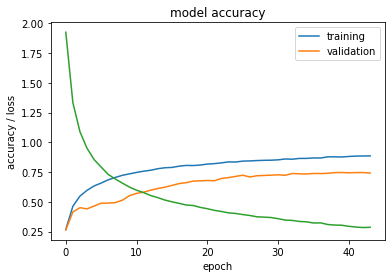

In [186]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [170]:
final_features=scaler.transform(final_data)
final_labels=tf.keras.utils.to_categorical(y,6)

In [187]:
loss, acc = model.evaluate(final_features, final_labels, verbose=0)
print('Overall Accuracy: %.3f' % acc)

Overall Accuracy: 0.798


#### *A highly complicated DNN of 350 thousand trainable parameters yields only a 2% yield in accuracy making us wonder whether it's worth the effort & resources*